<a href="https://colab.research.google.com/github/DNCHOW1/Carmax-Pirating/blob/main/carmax_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving car_data.csv to car_data.csv


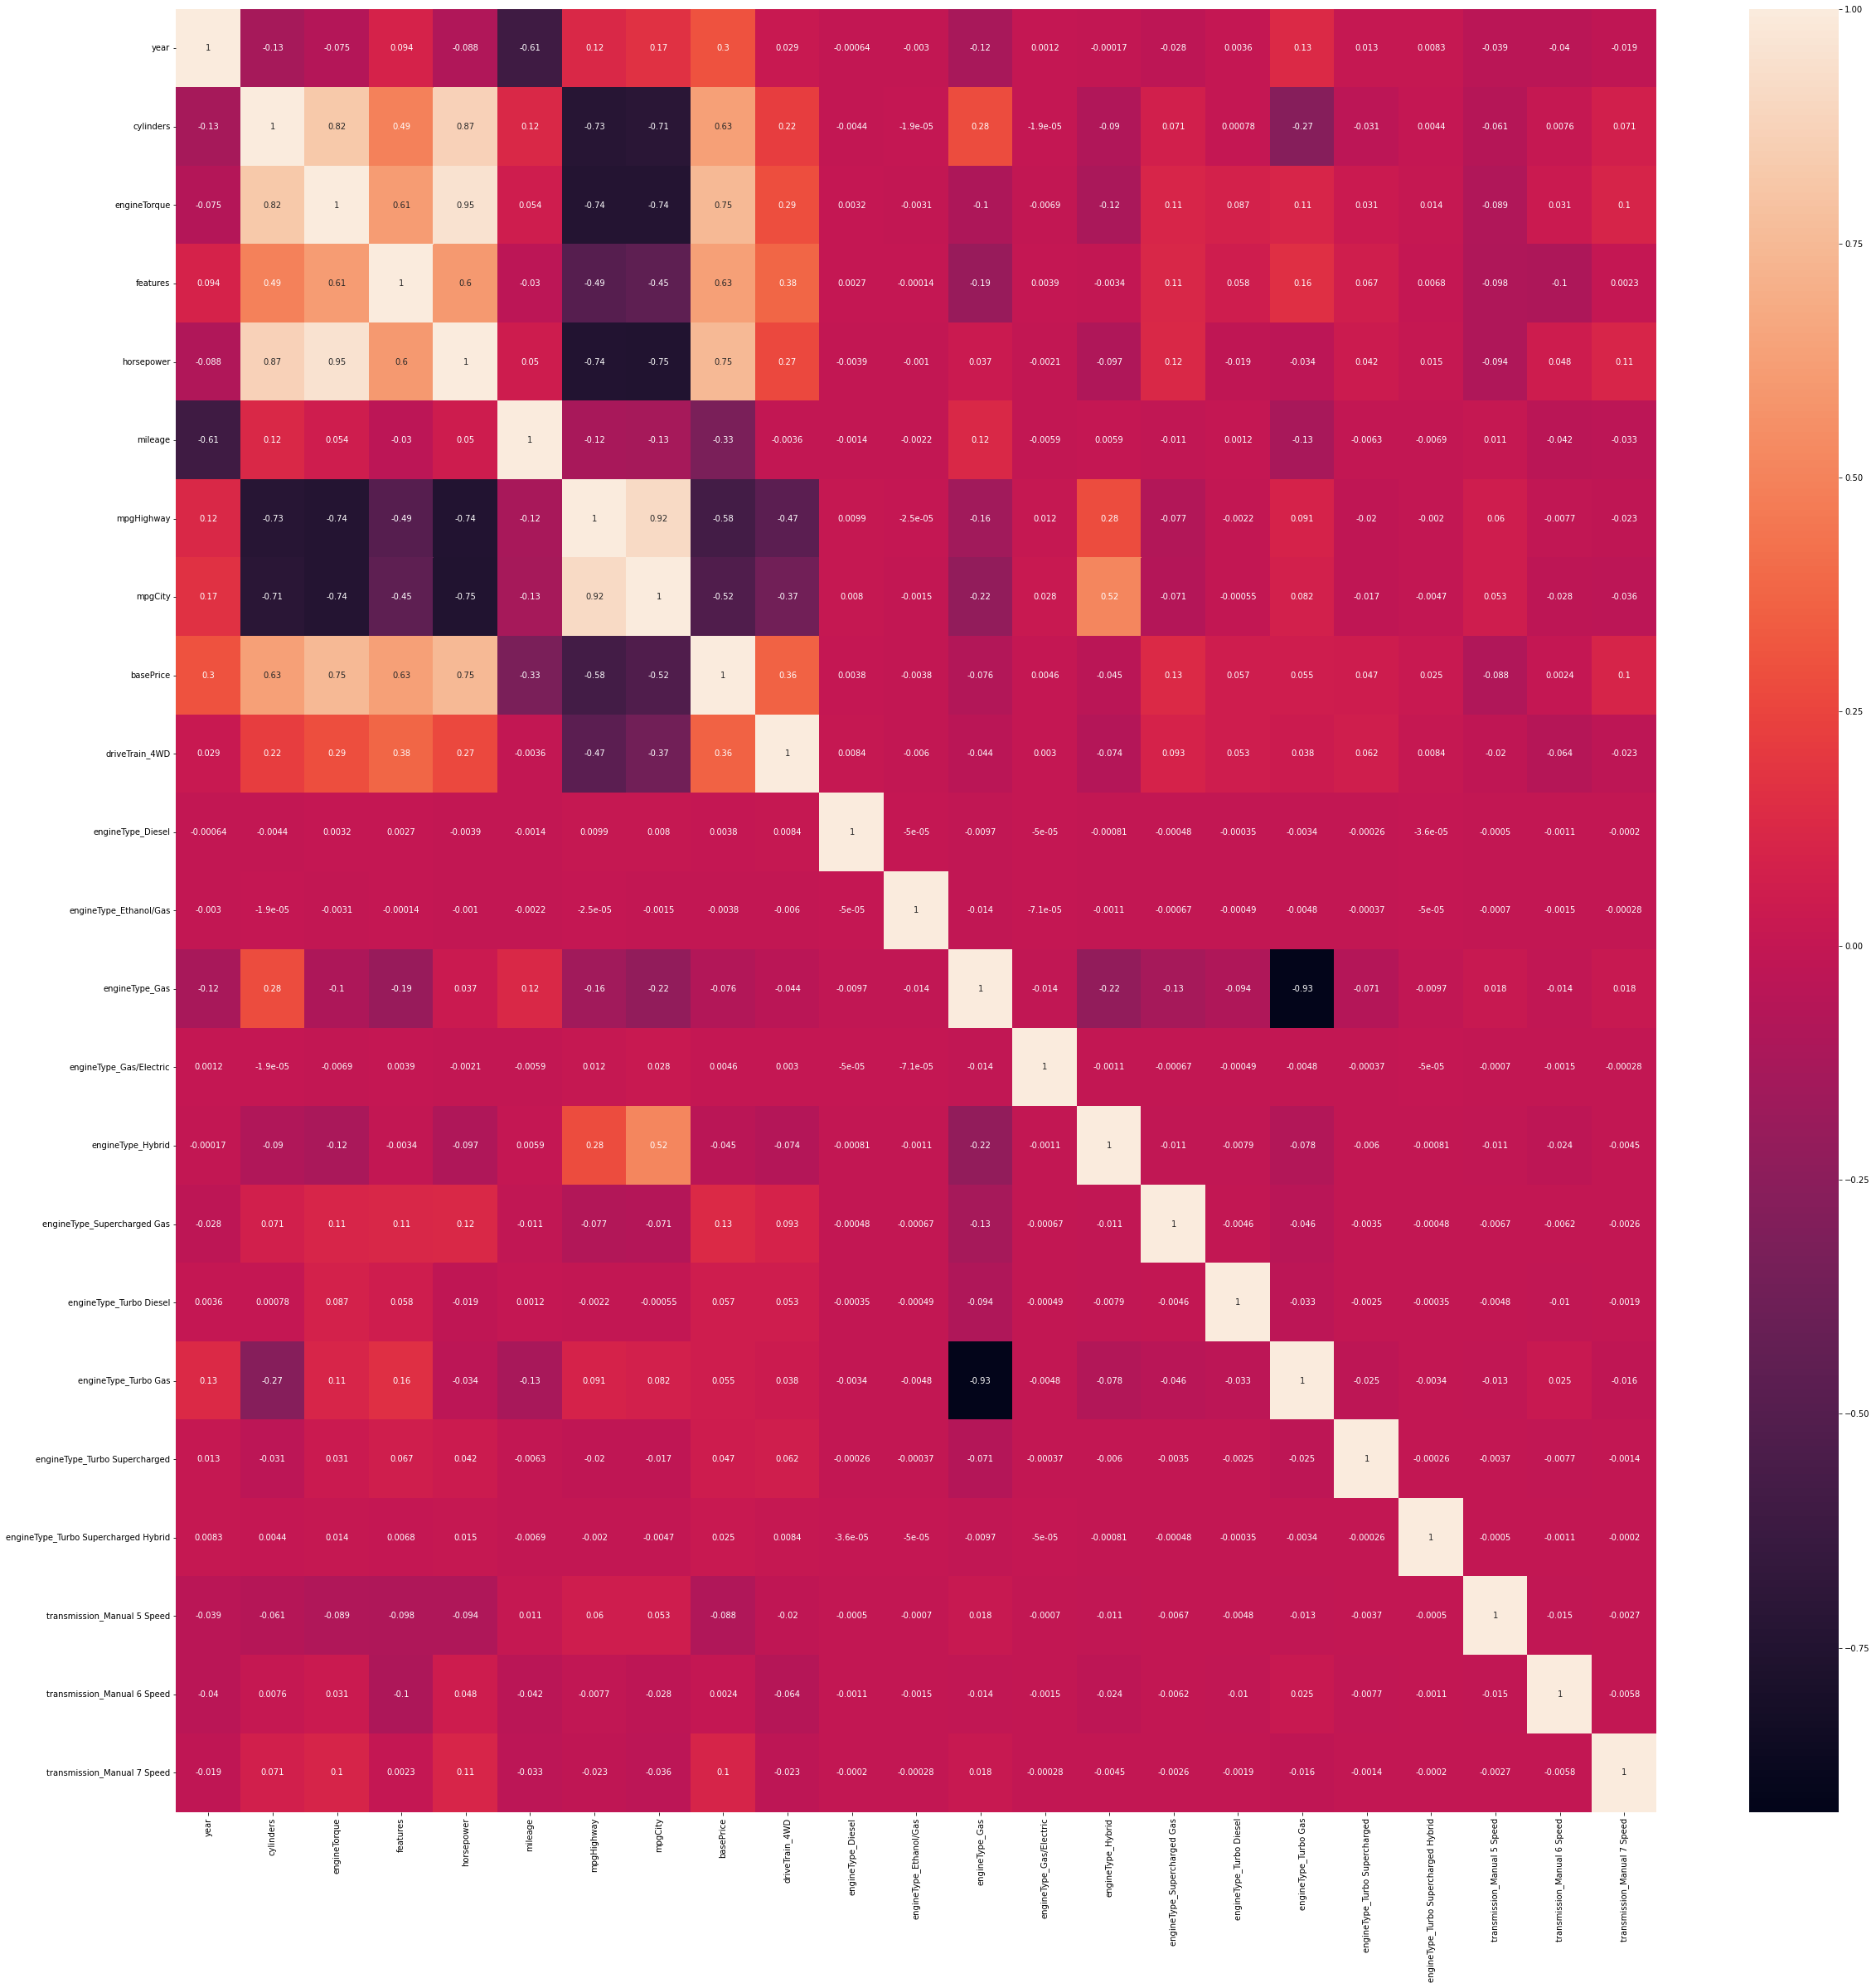

Predicted Price:  [25406.77969511]


"''"

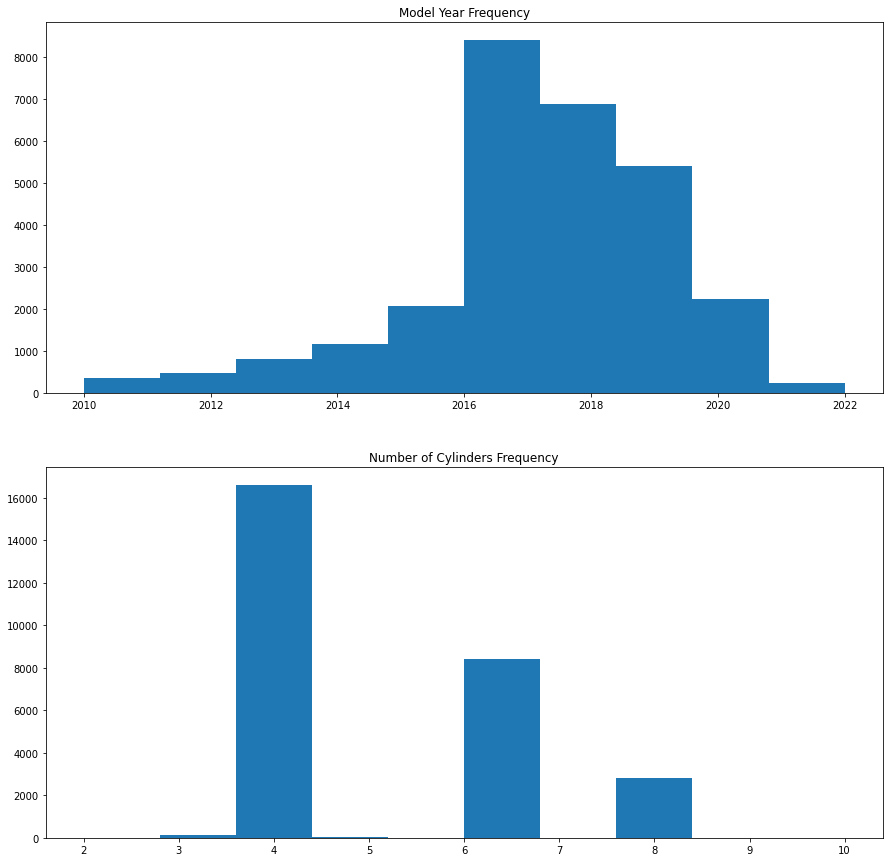

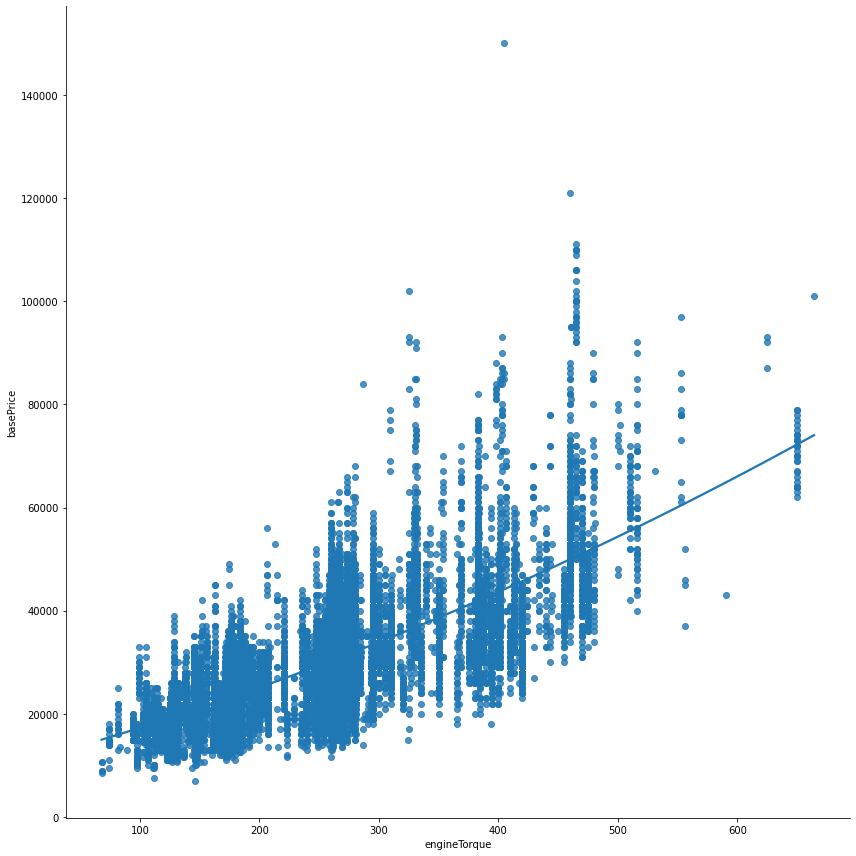

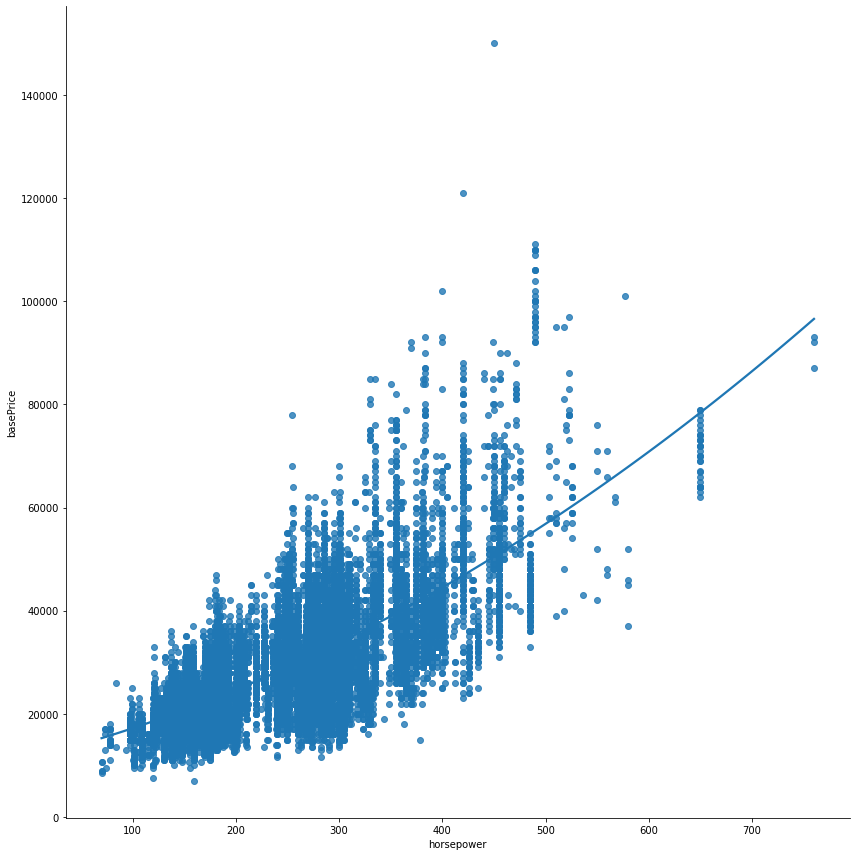

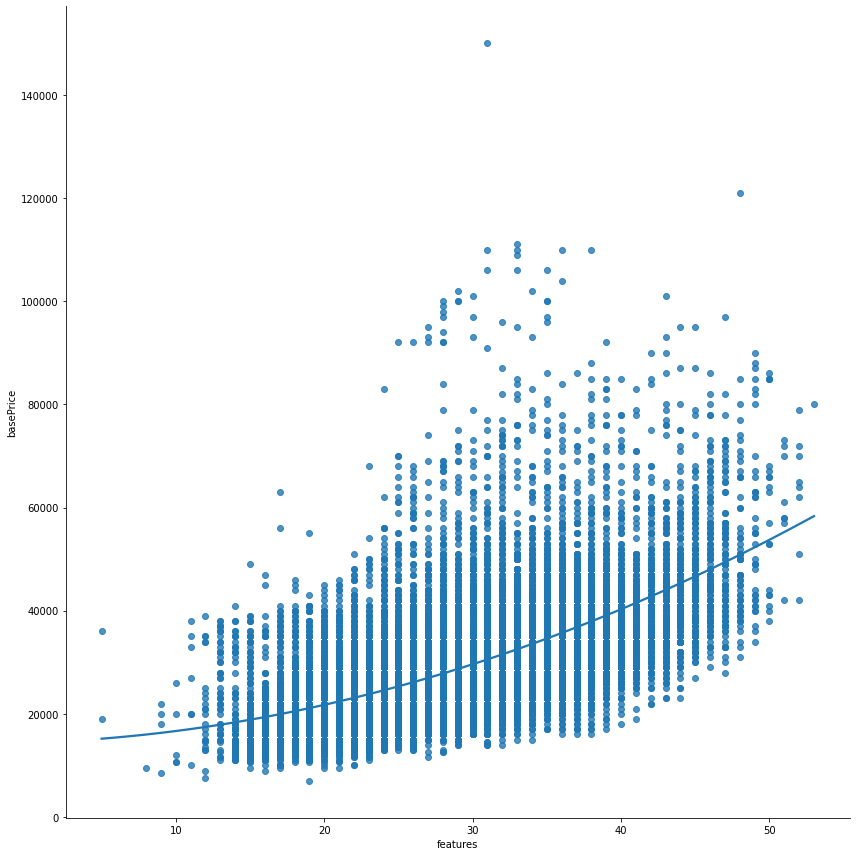

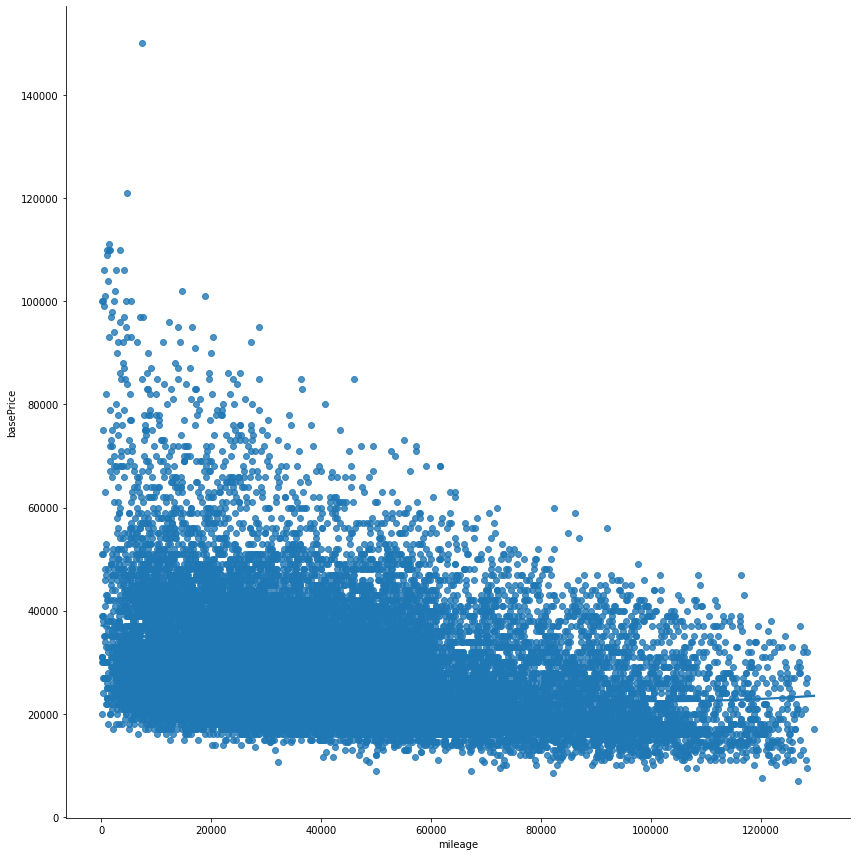

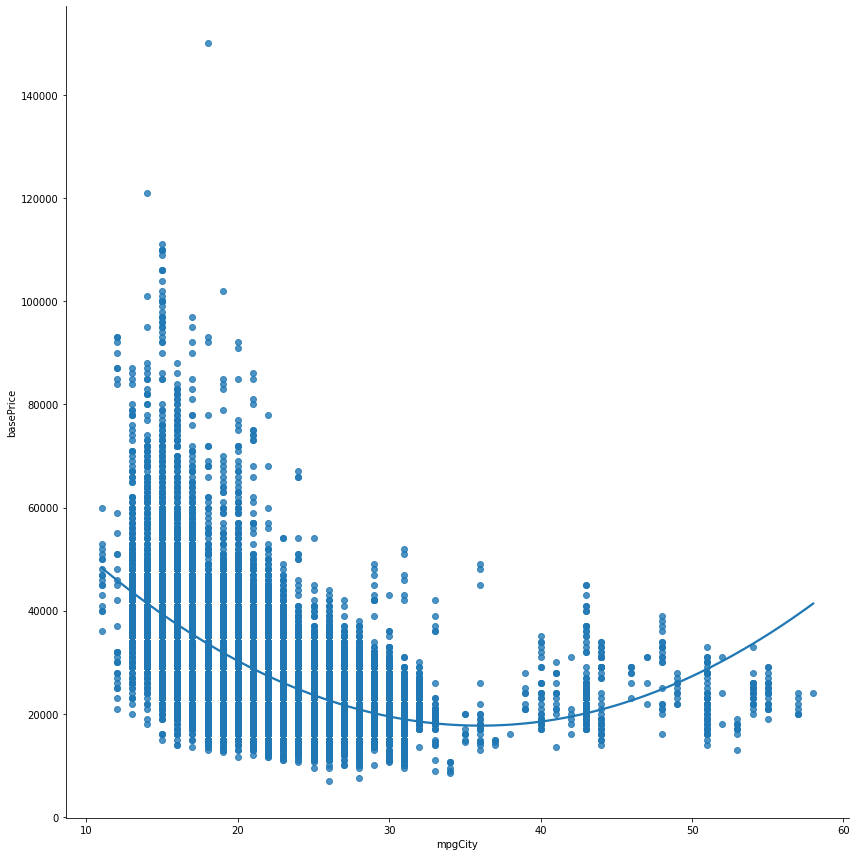

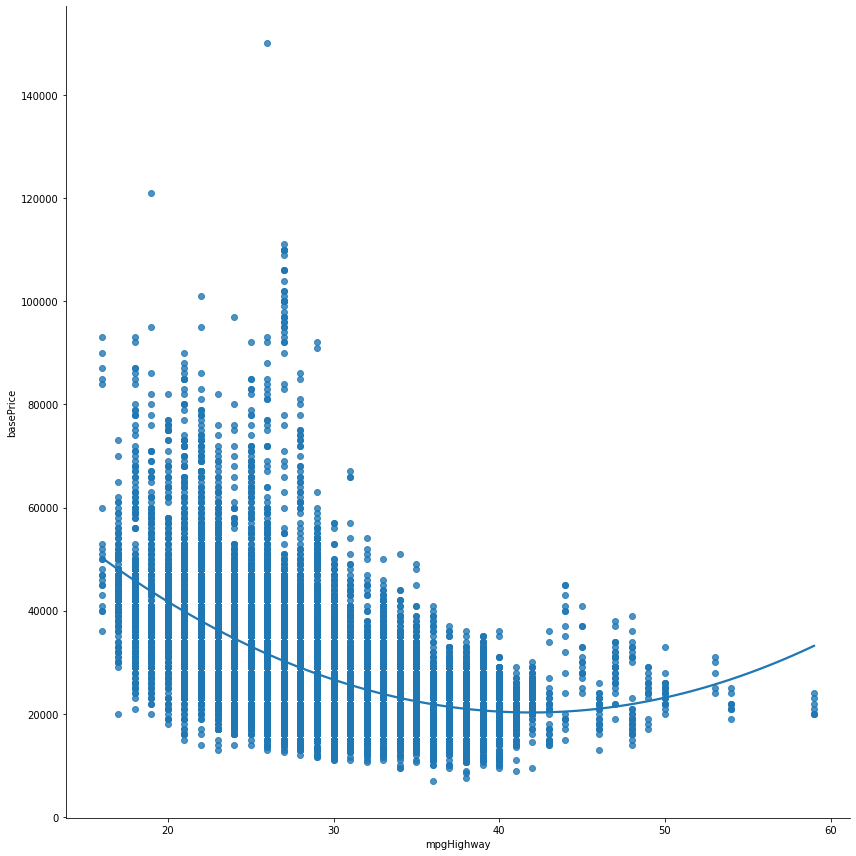

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
import statsmodels.api as sm


df = pd.read_csv("car_data.csv")
#print(df.describe())
df = df.dropna(axis = 0)


feature_names = df.loc[:, ['year','driveTrain','cylinders','engineTorque','engineType', 'features',
                           'horsepower','mileage','mpgHighway','mpgCity','transmission','basePrice']]



features_categorical = feature_names.select_dtypes(include = ['object'])
features = pd.get_dummies(features_categorical, drop_first = True)
feature_names = feature_names.drop(list(features_categorical.columns), axis = 1)
feature_names = pd.concat([feature_names, features], axis = 1)


cols = feature_names.columns
feature_names = pd.DataFrame(scale(feature_names))
feature_names.columns = cols

cors = feature_names.corr()

plt.figure(figsize=(40,40))
sns.heatmap(cors, annot = True)


plt.show()


X = df[['year', 'cylinders', 'engineTorque', 'horsepower', 'features', 'mileage','mpgCity', 'mpgHighway']]
Y = df['basePrice']
predictVals = [[2018,6,187,187,25,60000,25,30]]


plt.subplots(2,1,figsize = (15,15))
ax1 = plt.subplot(2,1,1)
plt.hist(x = df['year'], range = (df['year'].min(), df['year'].max()))
ax2 = plt.subplot(2,1,2)
plt.hist(x = df['cylinders'], range = (df['cylinders'].min(), 10), bins = 10)

ax1.set_title('Model Year Frequency')
ax2.set_title('Number of Cylinders Frequency')


for index, feature in enumerate(X):
  if(index > 1):
    sns.lmplot(data = df, x = feature, y = 'basePrice', order = 2, height = 12, ci = False)

poly = PolynomialFeatures(degree = 2)
newX = poly.fit_transform(X)
newPredict = poly.fit_transform(predictVals) 

regr = linear_model.LinearRegression()
regr.fit(newX, Y)
predicted = regr.predict(newPredict)

print("Predicted Price: ", predicted)




, ''